# 1. Loading libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [2]:
# from sklearn.linear_model import LinearRegression # to build linear regression_model
# from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error   # to check model performance

<IPython.core.display.Javascript object>

# 2. Loading and exploring the data

In [3]:
# index_col: Column(s) to use as the row labels of the ``DataFrame``,
# either given as string name or column index.
df = pd.read_csv("FIFA2019.csv", index_col=0)

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")
df.shape

There are 18207 rows and 88 columns


(18207, 88)

<IPython.core.display.Javascript object>

In [4]:
# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
#np.random.seed(1)
df.sample(n=10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
14078,237359,L. Jonsson,25,https://cdn.sofifa.org/players/4/19/237359.png,Sweden,https://cdn.sofifa.org/flags/46.png,61,65,IK Sirius,https://cdn.sofifa.org/teams/2/light/113458.png,€230K,€1K,942,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,30.0,"Dec 20, 2014",NaN,2019,6'3,209lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,6.0,13.0,23.0,9.0,11.0,11.0,13.0,23.0,19.0,36.0,35.0,44.0,51.0,32.0,16.0,36.0,28.0,73.0,5.0,24.0,6.0,5.0,42.0,17.0,42.0,21.0,14.0,10.0,62.0,62.0,61.0,58.0,63.0,€305K
13801,226264,F. Ahumada,22,https://cdn.sofifa.org/players/4/19/226264.png,Chile,https://cdn.sofifa.org/flags/55.png,62,72,CD Palestino,https://cdn.sofifa.org/teams/2/light/111328.png,€500K,€1K,1548,Right,1.0,2.0,3.0,Medium/ Medium,Normal,No,ST,29.0,"Jul 1, 2017",NaN,2018,5'11,165lbs,61+2,61+2,61+2,61+2,60+2,60+2,60+2,61+2,60+2,60+2,60+2,61+2,56+2,56+2,56+2,61+2,48+2,46+2,46+2,46+2,48+2,46+2,41+2,41+2,41+2,46+2,53.0,63.0,59.0,61.0,38.0,64.0,45.0,33.0,58.0,65.0,70.0,71.0,66.0,61.0,66.0,63.0,65.0,70.0,69.0,56.0,33.0,22.0,51.0,50.0,51.0,52.0,32.0,27.0,23.0,12.0,12.0,14.0,9.0,16.0,€775K
7339,114356,M. Wölfli,35,https://cdn.sofifa.org/players/4/19/114356.png,Switzerland,https://cdn.sofifa.org/flags/47.png,68,68,BSC Young Boys,https://cdn.sofifa.org/teams/2/light/900.png,€210K,€4K,1063,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,1.0,"Jul 1, 2000",NaN,2019,6'1,194lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,13.0,13.0,13.0,14.0,11.0,16.0,14.0,12.0,12.0,37.0,42.0,46.0,69.0,52.0,13.0,66.0,24.0,59.0,12.0,36.0,23.0,16.0,50.0,11.0,64.0,14.0,11.0,13.0,72.0,61.0,72.0,67.0,67.0,€315K
5170,240243,Matheus Cunha,19,https://cdn.sofifa.org/players/4/19/240243.png,Brazil,https://cdn.sofifa.org/flags/54.png,70,85,RB Leipzig,https://cdn.sofifa.org/teams/2/light/112172.png,€3.8M,€14K,1723,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,ST,20.0,"Jul 1, 2018",NaN,2023,6'0,165lbs,68+2,68+2,68+2,69+2,69+2,69+2,69+2,69+2,67+2,67+2,67+2,67+2,59+2,59+2,59+2,67+2,49+2,45+2,45+2,45+2,49+2,46+2,40+2,40+2,40+2,46+2,64.0,69.0,61.0,57.0,61.0,71.0,62.0,56.0,55.0,73.0,78.0,75.0,69.0,67.0,69.0,74.0,73.0,68.0,64.0,68.0,59.0,14.0,68.0,68.0,60.0,64.0,30.0,14.0,24.0,8.0,7.0,13.0,13.0,11.0,€8.9M
7231,215192,G. Díaz,30,https://cdn.sofifa.org/players/4/19/215192.png,Argentina,https://cdn.sofifa.org/flags/52.png,68,68,Vélez Sarsfield,https://cdn.sofifa.org/teams/2/light/101088.png,€650K,€6K,1894,Right,1.0,2.0,3.0,Medium/ Medium,Normal,No,RB,24.0,"Aug 3, 2017",NaN,2020,5'9,165lbs,62+2,62+2,62+2,68+2,67+2,67+2,67+2,68+2,68+2,68+2,68+2,69+2,68+2,68+2,68+2,69+2,68+2,67+2,67+2,67+2,68+2,67+2,63+2,63+2,63+2,67+2,72.0,44.0,52.0,67.0,45.0,69.0,71.0,67.0,68.0,73.0,78.0,72.0,76.0,70.0,73.0,72.0,67.0,80.0,66.0,69.0,67.0,65.0,66.0,72.0,50.0,56.0,64.0,62.0,59.0,7.0,8.0,8.0,7.0,8.0,€975K
2232,204367,B. van Leer,26,https://cdn.sofifa.org/players/4/19/204367.png,Netherlands,https://cdn.sofifa.org/flags/34.png,74,76,NAC Breda,https://cdn.sofifa.org/teams/2/light/1904.png,€4.7M,€11K,1183,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,1.0,NaN,Ajax,"Jun 30, 2019",6'2,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1

<IPython.core.display.Javascript object>

In [5]:
# Drop the columns that are not useful
df.drop(['ID', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number'],axis=1,inplace=True)

<IPython.core.display.Javascript object>

## Dealing with Missing Values

In [6]:
# Get the data type and null value count for each of the columns
# If a data type for numerical column is "object", then that column is missing some value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

<IPython.core.display.Javascript object>

In [7]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Loaned From                 16943
RWB                          2085
LCM                          2085
LF                           2085
LW                           2085
RS                           2085
ST                           2085
LS                           2085
RW                           2085
LAM                          2085
CAM                          2085
RAM                          2085
LM                           2085
CM                           2085
RF                           2085
RCM                          2085
RM                           2085
LWB                          2085
LDM                          2085
CDM                          2085
RDM                          2085
LB                           2085
LCB                          2085
CB                           2085
RCB                          2085
RB                           2085
CF                           2085
Release Clause               1564
Joined                       1553
Contract Valid

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='legs'>

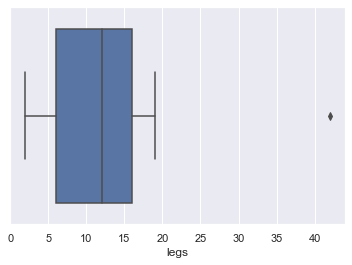

<IPython.core.display.Javascript object>

In [8]:
# data = pd.DataFrame(
#     {
#         "Col1": [100, 200, 300, 400],
#         "Col2": [500, 600, 700, 800],
#         "Col3": [900, 1000, 1100, 1200],
#         "Col4": ["Nature", "Wildlife", "Animals", "Humans"],
#     }
# )
# data
# np.mean(data, axis=1)
# data["Col4"].str.replace("Nature", "Beauty")
# data["Col4"].str.replace("Nature","Beauty", axis=0,inplace=False)
# data["Col4"].replace("Nature", "Beauty", inplace=False)
p1 = pd.Series([2, 5, 12, 15, 19, 4, 6, 11, 16, 18, 12, 12, 42], name="legs")
sns.boxplot(x=p1)

In [1]:
## Pearson Coefficient
from scipy.stats import pearsonr
list1 = [4, 5, 8, 10, 11]
list2 = [50, 48, 45 , 42, 41]

corr, pvalue= pearsonr(list1,list2)
print(corr)
print (pvalue)

-0.9963817945771083
0.0002611186203867432


# Decision Tree, Logistic Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree